### HEX TILE MAP FOR 2020 QUEENSLAND STATE ELECTION

In [73]:
# libraries
#import requests
#from bs4 import BeautifulSoup, Tag
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd
import pickle

In [160]:
### import the position codes for our hextiles graph
hex2020 = pd.read_csv('Q2020hextiles.csv') 

([], <a list of 0 Text major ticklabel objects>)

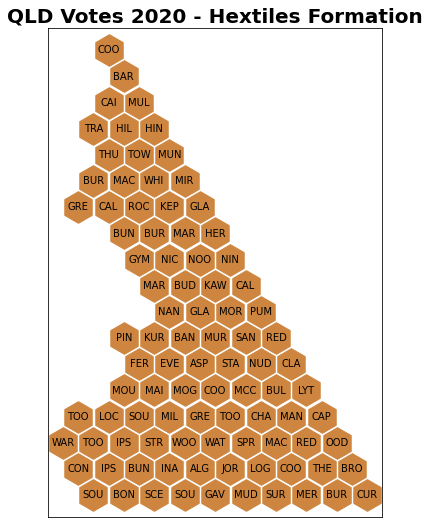

In [164]:
# an "empty" template version
fig, ax = plt.subplots()
plt.title('QLD Votes 2020 - Hextiles Formation', fontdict={'fontsize': 20, 'fontweight': 'bold'})
ax.scatter(hex2020['x'], hex2020['y'], marker='h', s=1000, c='peru')
for i, point in hex2020.iterrows():
        text1 = str(point['Seat'][0:3].upper())
        plt.text(point['x'], point['y'], text1[0:4], ha="center", va="center")
plt.rcParams['figure.figsize'] = (6, 9)
plt.xticks([])
plt.yticks([])

In [184]:
# Now with the 2017 2PP results plugged in

# firstly, unpickle the df of 2017_2PP_seats
df = pd.read_pickle("./2017_2PP_seats.pkl")            # pickles the df to access elsewhere

In [185]:
df = df.merge(hex2020, how="left")  #  add hex details to each seats row   -- and next, color codes
df['color'] = np.where(df['winning party'] == 'ALP', 'tomato', np.where(df['winning party'] == 'GRN', 'springgreen', np.where(df['winning party'] == 'KAP', 'lightgrey', 'deepskyblue')))

([], <a list of 0 Text major ticklabel objects>)

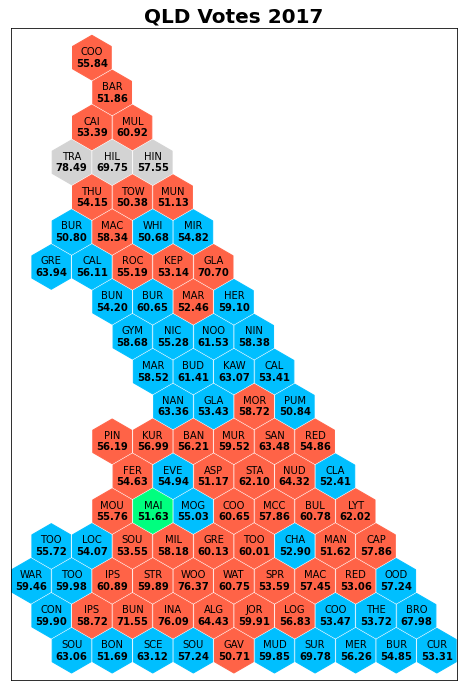

In [182]:
##  Now to show it with real results

fig, ax = plt.subplots()
plt.title('QLD Votes 2017', fontdict={'fontsize': 20, 'fontweight': 'bold'})
ax.scatter(df['x'], df['y'], marker='h', s=2000, c=df['color'], )
for i, point in df.iterrows():                
        plt.text(point['x'], point['y']-0.05, point['winning pc'],ha="center", va="center", weight="bold")
        plt.text(point['x'], point['y']+0.05, point['Seat'][0:3].upper(),ha="center", va="center")
plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])